<a href="https://colab.research.google.com/github/Archi2903/AI-in-Engenery/blob/main/HW_03_Mini_Project_(MS_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ENR4320] Energy Resources and AI 22251844 이도윤

##HW #03 - Mini-Project (MS classification)

Data 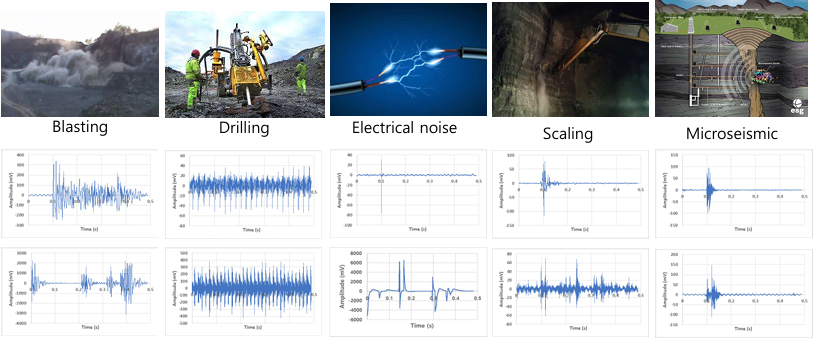

Attributes:
-  Duration
-  Rising time
-  Maximum amplitude
-  Relative amplitude
-  Pseudo energy
-  Pseudo frequency




In [29]:
# import library
import pandas as pd  # pandas for csv table data
import matplotlib.pyplot as plt  # graph
import numpy as np # numeric operations
# import tensorflow as tf # ml NOT WORK NEED TIME FOR FIND SOLUTION
# import tensorflow_decision_forests as tfdf # model Random forest NOT WORK NEED TIME FOR FIND SOLUTION

from sklearn.model_selection import train_test_split  # for split data
from sklearn.ensemble import RandomForestClassifier   # model Random forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay  # estimate


# read data csv
df = pd.read_csv('danyang_ms_train.csv')

# test print data csv
print("Column:", df.columns.tolist())      # show collum value
print("Sample size:", df.shape)         # sample size


print(df.head)  # print

# Show (Label)
print(df['Label'].value_counts())  # dataset


Column: ['Duration', 'Rising_time', 'Absolute_amplitude', 'Relative_amplitude', 'Pseudo_energy', 'Psudo_freq', 'Label']
Sample size: (3375, 7)
<bound method NDFrame.head of       Duration  Rising_time  Absolute_amplitude  Relative_amplitude  \
0     0.488282     0.048906           87.319443            0.019629   
1     0.443321     0.081856           54.576271            0.076005   
2     0.016250     0.005723           57.395706            0.543220   
3     0.050586     0.004277           64.888947            0.283787   
4     0.285449     0.169414          169.013840            0.033295   
...        ...          ...                 ...                 ...   
3370  0.011406     0.002969          330.973999            0.784962   
3371  0.378184     0.000176          475.284912            0.214451   
3372  0.420547     0.192988           82.400215            0.100709   
3373  0.011563     0.001934          256.248444            0.736836   
3374  0.488067     0.029023          155.33903

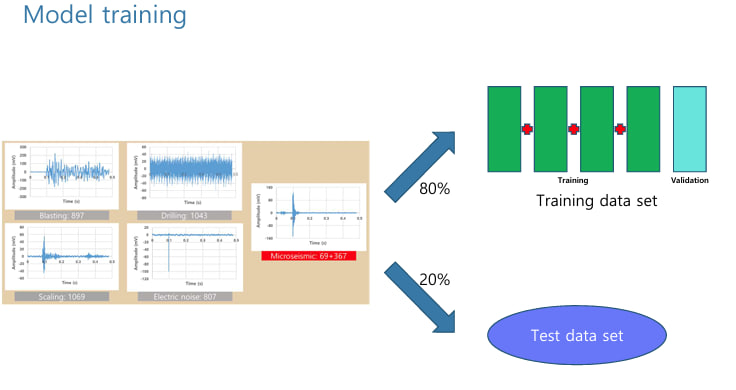

In [30]:
# Def (X)-columns and y-label
columns = ['Duration', 'Rising_time', 'Absolute_amplitude', 'Relative_amplitude', 'Pseudo_energy', 'Psudo_freq']
X = df[columns]
y = df['Label']

# split (80% training, 20% test data set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% test data set
    stratify=y,             # split class
    random_state=42         # rand 42 magic number take from ppt
)
print("Training sample :", X_train.shape, "Test sample:", X_test.shape)  # print training 80% and test 20%


Training sample : (2700, 6) Test sample: (675, 6)


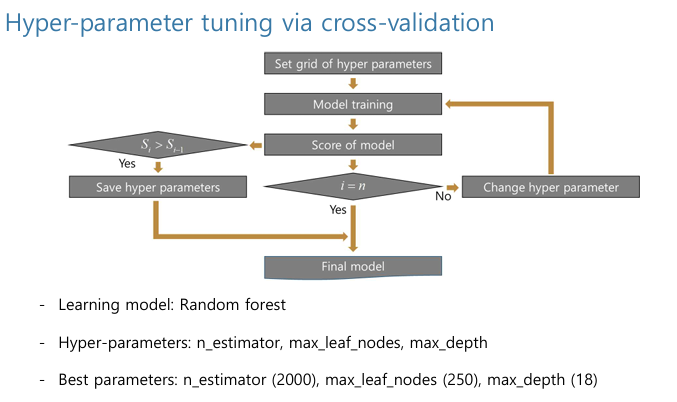

In [31]:
# Weights for Seismic 2 another 1
class_weights = {
    'microseismic': 2.0,  # Double the weight on microseismic signals to improve recall score
    'drilling': 1.0,
    'scaling': 1.0,
    'blasting': 1.0,
    'electric noise': 1.0
}

# Random forest model for training
model = RandomForestClassifier(n_estimators=2000,
                               max_leaf_nodes=250,
                               max_depth=18,
                               class_weight=class_weights,
                               random_state=42,
                               n_jobs=-1)

# Train model
model.fit(X_train, y_train)  #

RandomForestClassifier(class_weight={'blasting': 1.0, 'drilling': 1.0,
                                     'electric noise': 1.0, 'microseismic': 2.0,
                                     'scaling': 1.0},
                       max_depth=18, max_leaf_nodes=250, n_estimators=2000,
                       n_jobs=-1, random_state=42)

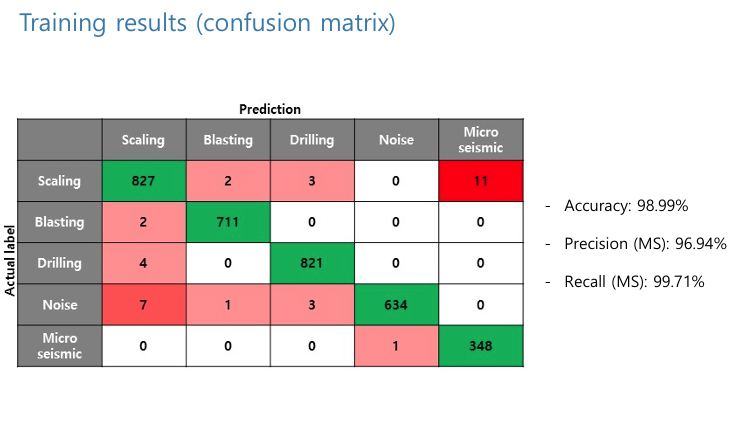

Accuracy: 0.895
Precision (MS): 0.897
Recall (MS): 0.892

Confusion Matrix (counts):
 [[136   2   1   0   4]
 [  1 153   1   0  10]
 [  8   0 105   2  14]
 [  0   0   0  62   8]
 [  1   3   9   7 148]]


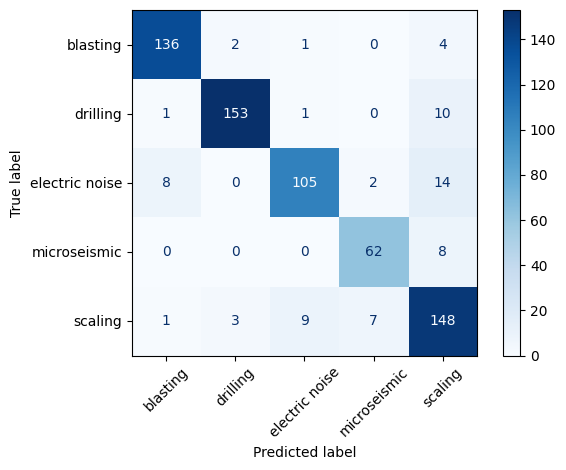

In [34]:
# Training results (confusion matrix)
y_pred = model.predict(X_test)

# calculate Accuracy,Precision (MS), Recall (MS)

accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision (MS): {precision_macro:.3f}")
print(f"Recall (MS): {recall_macro:.3f}")

#  plot confusion matrix)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("\nConfusion Matrix (counts):\n", cm)


disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=model.classes_, cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


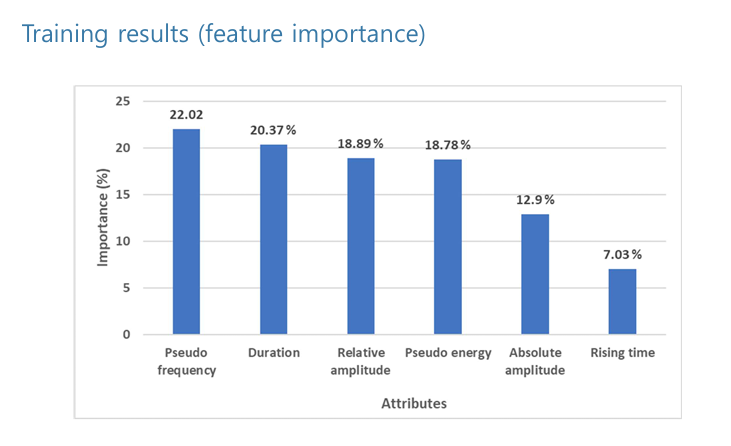

Duration: 0.1920
Rising_time: 0.0712
Absolute_amplitude: 0.1223
Relative_amplitude: 0.1952
Pseudo_energy: 0.1979
Psudo_freq: 0.2214


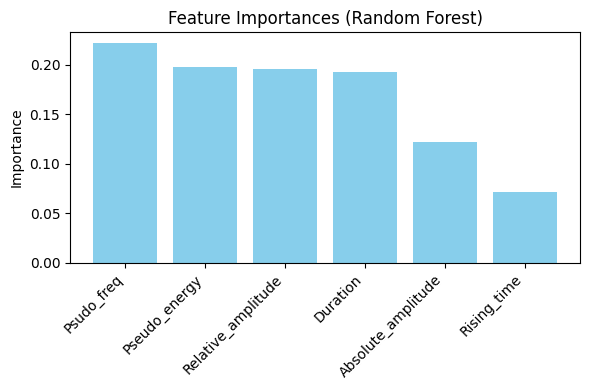

In [37]:
# Estimate result
feature_importances = model.feature_importances_
features = columns


for feat, importance in zip(features, feature_importances):
    print(f"{feat}: {importance:.4f}")


import numpy as np
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(6,4))
plt.bar(range(len(features)), feature_importances[indices], color='skyblue')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


데이터를 활용하여 Random Forest 모델을 학습시키는 과제가 주어졌다.
모델 학습 후 테스트 결과, 정확도(Accuracy)는 89.5%, 정밀도(Precision)는 89.7%, 재현율(Recall)은 89.2%로 나타나 모델의 신뢰도가 높음을 확인할 수 있었다.
다만, 데이터의 양을 늘릴 경우 성능 지표가 더욱 향상될 것으로 예상된다.

이후 미소지진 신호(classification of microseismic signals)를 분류하기 위해 Duration, Rising_time, Absolute_amplitude, Relative_amplitude, Pseudo_energy, Psudo_freq 등의 지표가 계산되었다.
그 결과, 가장 중요한 특징 변수는 Psudo_freq (22.1%), Pseudo_energy (19.8%), **Relative_amplitude (19.5%)**로 나타났다.
감사합니다